In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve
from sklearn.naive_bayes import GaussianNB

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('../../formspring_data.csv',delimiter='\t',quoting=3)

In [3]:
df = df[['ques','ans1']]  #limiting to question and answer 
#replacing html symbols
df['ques'] = df['ques'].str.replace('&#039;',' ')
df['ques'] = df['ques'].str.replace('&quot;',' ')
df['ques'] = df['ques'].str.replace('<br>',' ')    

In [4]:
df = df.dropna()
positives = df[df['ans1']=='Yes']
negatives = df[df['ans1']=='No']
frames = [positives,negatives]

In [5]:
df = pd.concat(frames)
df = df.sample(frac=1)

<AxesSubplot:title={'center':'No of cyberbullying cases'}>

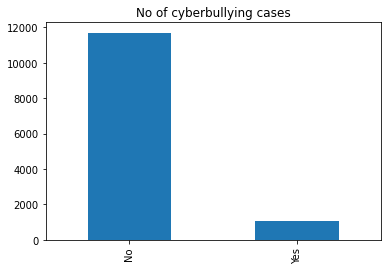

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

df['ans1'].value_counts().plot(kind='bar',title='No of cyberbullying cases')

In [7]:
df['ans1'] = df['ans1'].replace(('Yes','No'),(1,0))
bag = []
def clean_data(sentence):
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    sentence = sentence.lower().split()
    words = [word for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(words)
    bag.append(sentence)

In [8]:
df['ans1'] = df['ans1'].astype(int)
df.head()

,ques,ans1
3596,Your into Pryce?,0
12700,Which country do you currently reside? (If it ...,0
2252,what s up? how s timmy and you? haha,0
2780,! w@n+ yUh t@ m@k3 m3 $w3@+,0
8789,do you believe in any superstitions?,0


In [9]:
df['ques'].apply(clean_data)
len(bag)

12729

In [10]:
y = df['ans1'].values

cv = CountVectorizer()
X_train,X_test,y_train,y_test = train_test_split(bag,y,test_size=0.2,random_state=0)
cv.fit(X_train)
X_train = cv.transform(X_train).toarray() #create sparse matrix 
X_test = cv.transform(X_test).toarray()
clf = GaussianNB()
clf.fit(X_train,y_train)


GaussianNB()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
score = accuracy_score(y_test,y_pred)
f1_score__ = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("Accuracy => ",score)
print("Recall => ",recall)
print("F1 score => ",f1_score__)

Accuracy =>  0.6417910447761194
Recall =>  0.51
F1 score =>  0.1827956989247312


In [14]:
precision =  precision_score(y_test,y_pred)
precision

0.11135371179039301

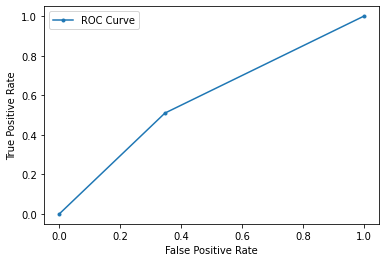

In [15]:
fp, tp, treshold = roc_curve(y_test, y_pred)
plt.plot(fp, tp, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [16]:
def get_roc_area_and_rates():
    from sklearn.metrics import confusion_matrix,roc_auc_score
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    true_positive_rate = (tp)/(tp + fn)
    false_positive_rate = (fp)/(tn + fp)
    area = roc_auc_score(y_test,y_pred)
    print("ROC area ",area)
    print("True positive rate ",true_positive_rate)
    print("False positive rate ",false_positive_rate)

get_roc_area_and_rates()

ROC area  0.5815132139812447
True positive rate  0.51
False positive rate  0.34697357203751067
